In [7]:
! pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, recall_score, accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'seaborn'

In [12]:
train_df = pd.read_csv('1/mitbih_train.csv', header=None)
test_df = pd.read_csv('1/mitbih_test.csv', header=None)

Text(0.5, 1.0, 'Classes Frequency')

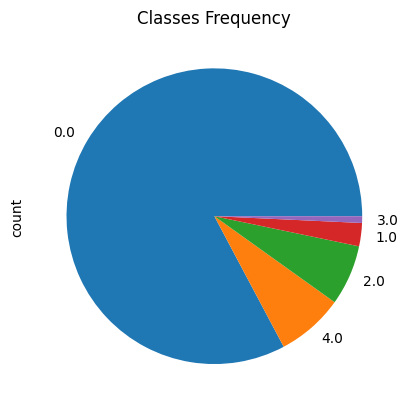

In [13]:
train_df.iloc[:, -1].value_counts().plot(kind='pie')
plt.title('Classes Frequency')

Text(0.5, 1.0, 'heartbeat signal sample')

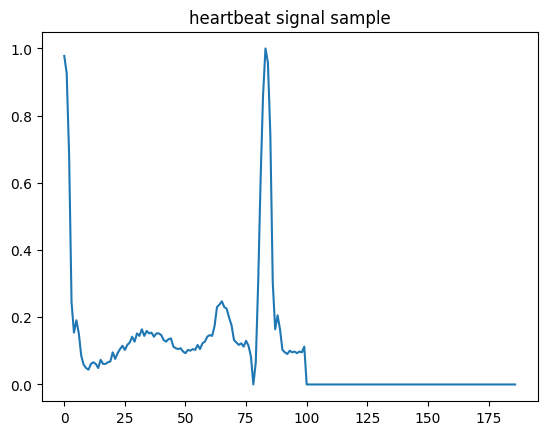

In [14]:
plt.plot(train_df.iloc[0, :-1])
plt.title('heartbeat signal sample')

In [31]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

from keras.optimizers import Adam

def create_model(input_dim=187):
    model = Sequential()
    
    model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(5, activation='softmax'))
    # model.compile(optimizer=Adam(learning_rate=0.001), 
    #               loss='sparse_categorical_crossentropy', 
    #               metrics=['accuracy'])

    return model
    

In [33]:
x=create_model()
x.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               96256     
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_6 (Batc  (None, 128)             

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
x.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, y_train.shape

((70043, 187), (70043,))

In [41]:
history = x.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

Epoch 1/50
2189/2189 [==============================] - 15s 6ms/step - loss: 0.2582 - accuracy: 0.9314 - val_loss: 0.1404 - val_accuracy: 0.9603
Epoch 2/50
2189/2189 [==============================] - 14s 6ms/step - loss: 0.1398 - accuracy: 0.9600 - val_loss: 0.1087 - val_accuracy: 0.9704
Epoch 3/50
2189/2189 [==============================] - 14s 6ms/step - loss: 0.1202 - accuracy: 0.9653 - val_loss: 0.1069 - val_accuracy: 0.9693
Epoch 4/50
2189/2189 [==============================] - 14s 7ms/step - loss: 0.1082 - accuracy: 0.9685 - val_loss: 0.1019 - val_accuracy: 0.9688
Epoch 5/50
2189/2189 [==============================] - 14s 7ms/step - loss: 0.0985 - accuracy: 0.9715 - val_loss: 0.1014 - val_accuracy: 0.9689
Epoch 6/50
2189/2189 [==============================] - 14s 6ms/step - loss: 0.0911 - accuracy: 0.9728 - val_loss: 0.0896 - val_accuracy: 0.9730
Epoch 7/50
2189/2189 [==============================] - 14s 6ms/step - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.0945 - val_ac

In [43]:
# Evaluate on test data
loss, accuracy = x.evaluate(X_test, y_test, verbose=0)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

loss: 0.0832681730389595
accuracy: 0.97825688123703


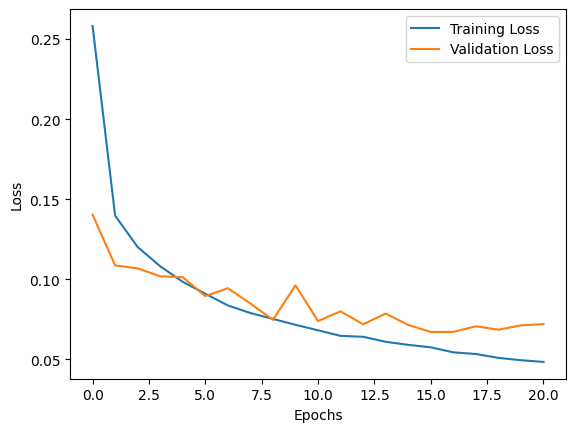

In [44]:
# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
y_pred = np.argmax(x.predict(X_test), axis=1)
from sklearn.metrics import classification_report, recall_score, accuracy_score

print(classification_report(y_pred, y_test))

685/685 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18219
           1       0.71      0.84      0.77       475
           2       0.94      0.94      0.94      1444
           3       0.73      0.81      0.77       145
           4       0.98      0.98      0.98      1609

    accuracy                           0.98     21892
   macro avg       0.87      0.91      0.89     21892
weighted avg       0.98      0.98      0.98     21892

